<a href="https://colab.research.google.com/github/VishalIITB/KNN-Classification-for-Cancer-Detection-in-Python/blob/main/KNN_Classification_for_Cancer_Detection_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

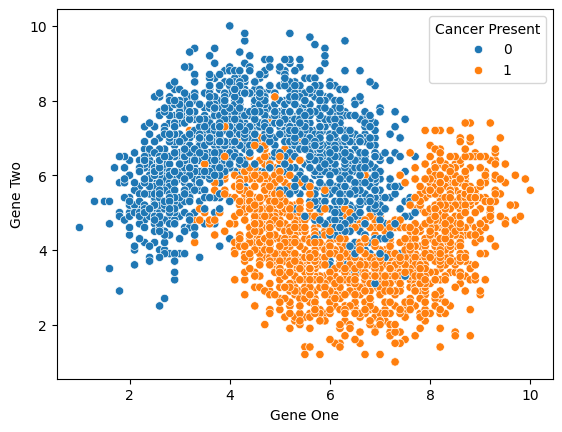

In [ ]:
sns.scatterplot(x='Gene One' ,y='Gene Two' , hue='Cancer Present',data=df)


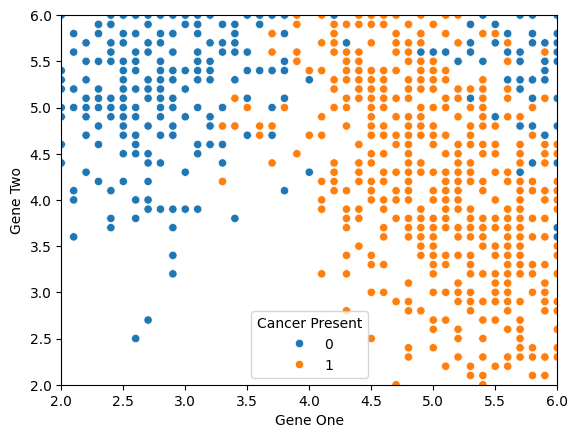

In [ ]:
sns.scatterplot(x='Gene One' ,y='Gene Two' , hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(2,6)
plt.show()

In [ ]:
#train, test and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
x=df.drop('Cancer Present' , axis=1)
y=df['Cancer Present']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
scaler =StandardScaler()

In [ ]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

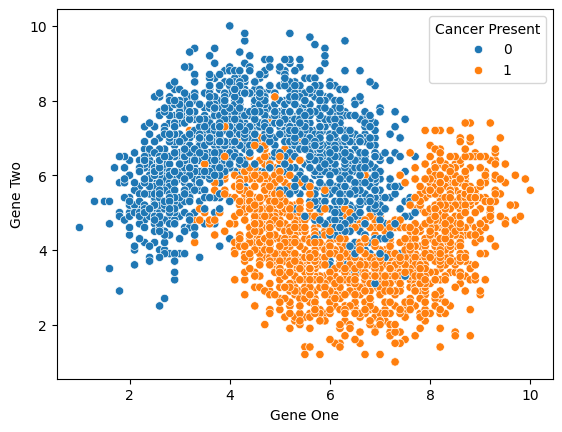

In [ ]:
sns.scatterplot(x='Gene One' ,y='Gene Two' , hue='Cancer Present',data=df)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=22)

In [ ]:
knn_model.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=22)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

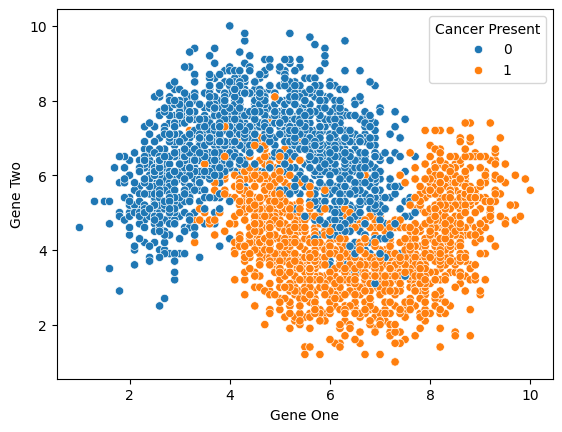

In [ ]:
sns.scatterplot(x='Gene One' ,y='Gene Two' , hue='Cancer Present',data=df)

In [ ]:
len(df)

3000

In [ ]:
full_test=pd.concat([x_test,y_test],axis=1)

In [ ]:
len(full_test)

900

<Axes: xlabel='Gene One', ylabel='Gene Two'>

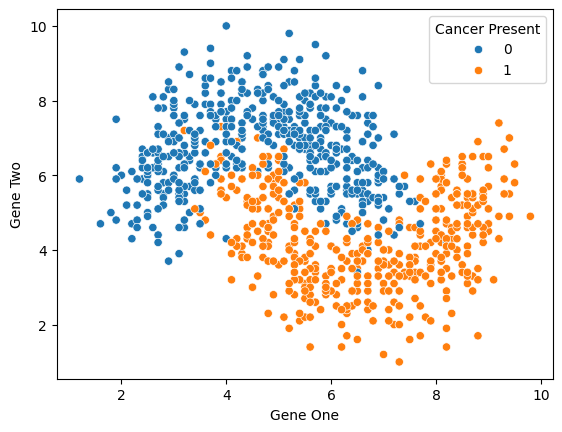

In [ ]:
sns.scatterplot(x='Gene One' ,y='Gene Two' , hue='Cancer Present',data=full_test)

In [ ]:
#Model Evaluation
import warnings
warnings.filterwarnings('ignore')
y_pred=knn_model.predict(scaled_x_test)
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9488888888888889

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



In [ ]:
#Elbow method for choosing  resonable k values
test_error_rate=[]
for i in range(1,30):
  knn_model=KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(scaled_x_train,y_train)
  pred_y=knn_model.predict(scaled_x_test)
  error_rate=np.mean(pred_y!=y_test)

  test_error=1-accuracy_score(y_test,pred_y)
  test_error_rate.append(test_error)





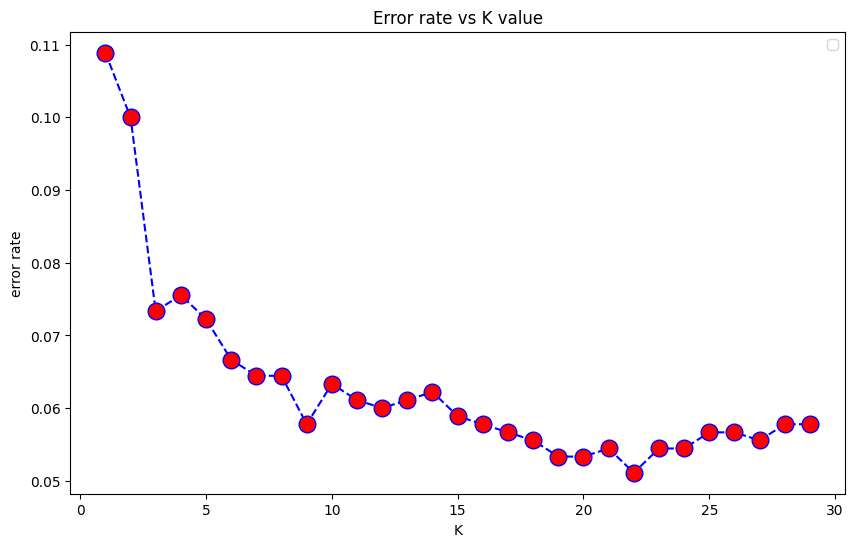

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),test_error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=12)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('error rate')
plt.legend()

In [ ]:
#cross validation search for k value
scaler=StandardScaler()
knn=KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
operations=[('scaler',scaler),('knn',knn)]
from sklearn.pipeline import Pipeline

In [ ]:
pipe=Pipeline(operations)
from sklearn.model_selection import GridSearchCV
